<a href="https://colab.research.google.com/github/mohd-raza/Learning-Tensorflow/blob/main/CNN_with_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-07-16 13:55:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   102MB/s    in 1.0s    

2022-07-16 13:55:30 (102 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/


pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train


750

In [ ]:
num_steak_images_test = len(os.listdir("pizza_steak/test/steak"))
num_steak_images_test

250

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


To visualize our images, lets get the classnames programmatically

In [ ]:
import pathlib 
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))
print(class_names)

['pizza' 'steak']


In [ ]:
# lets visualize our images
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # Setup the directory and view the images
  target_folder = target_dir+target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  
  
  # read in the image and plot it using matplot
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img



['10380.jpg']
Image shape: (288, 512, 3)


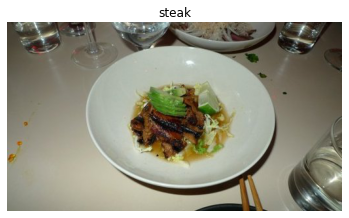

In [ ]:
# view a random image from the training dataset
img = view_random_image("pizza_steak/train/","steak")

['759873.jpg']
Image shape: (512, 512, 3)


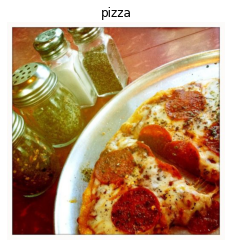

In [ ]:
# view a random image from the training dataset
img1 = view_random_image("pizza_steak/train/","pizza")

In [ ]:
tf.constant(img)

<tf.Tensor: shape=(288, 512, 3), dtype=uint8, numpy=
array([[[ 60,  51,  42],
        [ 65,  56,  47],
        [ 67,  58,  49],
        ...,
        [ 29,  30,  24],
        [ 27,  28,  22],
        [ 27,  28,  22]],

       [[ 61,  52,  43],
        [ 65,  56,  47],
        [ 66,  57,  48],
        ...,
        [ 31,  32,  26],
        [ 30,  31,  25],
        [ 29,  30,  24]],

       [[ 63,  54,  45],
        [ 66,  57,  48],
        [ 67,  58,  49],
        ...,
        [ 33,  34,  28],
        [ 32,  33,  27],
        [ 32,  33,  27]],

       ...,

       [[123, 126, 109],
        [123, 126, 109],
        [125, 128, 111],
        ...,
        [113, 131, 115],
        [121, 139, 123],
        [125, 143, 127]],

       [[122, 125, 108],
        [122, 125, 108],
        [123, 126, 109],
        ...,
        [103, 121, 105],
        [100, 118, 102],
        [101, 119, 103]],

       [[121, 124, 107],
        [122, 125, 108],
        [123, 126, 109],
        ...,
        [126, 144, 12

In [ ]:
img.shape 
# returns width height color channels

(288, 512, 3)

In [ ]:
#  get all the pixel values between 0 and 1
img/255.0

array([[[0.23529412, 0.2       , 0.16470588],
        [0.25490196, 0.21960784, 0.18431373],
        [0.2627451 , 0.22745098, 0.19215686],
        ...,
        [0.11372549, 0.11764706, 0.09411765],
        [0.10588235, 0.10980392, 0.08627451],
        [0.10588235, 0.10980392, 0.08627451]],

       [[0.23921569, 0.20392157, 0.16862745],
        [0.25490196, 0.21960784, 0.18431373],
        [0.25882353, 0.22352941, 0.18823529],
        ...,
        [0.12156863, 0.1254902 , 0.10196078],
        [0.11764706, 0.12156863, 0.09803922],
        [0.11372549, 0.11764706, 0.09411765]],

       [[0.24705882, 0.21176471, 0.17647059],
        [0.25882353, 0.22352941, 0.18823529],
        [0.2627451 , 0.22745098, 0.19215686],
        ...,
        [0.12941176, 0.13333333, 0.10980392],
        [0.1254902 , 0.12941176, 0.10588235],
        [0.1254902 , 0.12941176, 0.10588235]],

       ...,

       [[0.48235294, 0.49411765, 0.42745098],
        [0.48235294, 0.49411765, 0.42745098],
        [0.49019608, 0

An end-to-end example
We've checked out our data and found there's 750 training images, as well as 250 test images per class and they're all of various different shapes.

It's time to jump straight in the deep end.

Reading the original dataset authors paper, we see they used a Random Forest machine learning model and averaged 50.76% accuracy at predicting what different foods different images had in them.

In [ ]:
# Load our images
# preprocess our images
# build a cnn to find pattern in our image
# compile our cnn
# fit the cnn to our training data

In [ ]:
from tensorflow.python.eager.monitoring import Metric
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 


tf.random.set_seed(42)

# preprocesss data (get all the pixel between 0 and 1)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup paths to our directory

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42
                                               )
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model 

model_1 =  tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile our cnn

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 13s 262ms/step - loss: 0.5869 - accuracy: 0.6913 - val_loss: 0.4670 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 10s 204ms/step - loss: 0.4569 - accuracy: 0.7973 - val_loss: 0.3680 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 9s 201ms/step - loss: 0.3962 - accuracy: 0.8287 - val_loss: 0.3993 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3772 - accuracy: 0.8340 - val_loss: 0.3155 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3239 - accuracy: 0.8647 - val_loss: 0.2899 - val_accuracy: 0.8840


In [ ]:
model_1.evaluate(valid_data)

16/16 [==============================] - 2s 132ms/step - loss: 0.2899 - accuracy: 0.8840


[0.2899346947669983, 0.8840000033378601]

In [ ]:
model_1.summary(
  
)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [ ]:
# using a same model as before
# lets replicate the model from previous section

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=(len(train_data)),
                        validation_data=valid_data,
                        validation_steps=(len(valid_data)))


Epoch 1/5
47/47 [==============================] - 9s 182ms/step - loss: 1.2741 - accuracy: 0.4960 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 150528)            0         
                                                                 
 dense_13 (Dense)            (None, 4)                 602116    
                                                                 
 dense_14 (Dense)            (None, 4)                 20        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 183ms/step - loss: 2.5275 - accuracy: 0.6213 - val_loss: 1.2550 - val_accuracy: 0.6360
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 1.0922 - accuracy: 0.6953 - val_loss: 0.6636 - val_accuracy: 0.7200
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.6704 - accuracy: 0.7473 - val_loss: 0.6474 - val_accuracy: 0.7420
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6313 - accuracy: 0.7460 - val_loss: 0.5342 - val_accuracy: 0.7740
Epoch 5/5
47/47 [==============================] - 8s 177ms/step - loss: 0.5159 - accuracy: 0.7867 - val_loss: 0.5081 - val_accuracy: 0.7460


In [ ]:
model_3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 150528)            0         
                                                                 
 dense_16 (Dense)            (None, 100)               15052900  
                                                                 
 dense_17 (Dense)            (None, 100)               10100     
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Binary classification: Let's break it down
We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied
Let's step through each.

**1.Become one with Data**

['1117936.jpg']
Image shape: (512, 512, 3)
['3917951.jpg']
Image shape: (512, 512, 3)


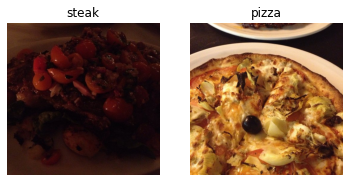

In [ ]:
# visualize the data

plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

**2. Preprocess the data**

In [ ]:
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

In [ ]:
!nvidia-smi

Sat Jul 16 13:58:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    28W /  70W |   2348MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Our next step is to turn our data into batches.

A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:

1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.*
Why 32?

2. A batch size of 32 is good for your health.

No seriously, there are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

To turn our data into batches, we'll first create an instance of ImageDataGenerator for each of our datasets.

In [ ]:
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next() # get the next batch of images
len(images),len(labels)

(32, 32)

In [ ]:
len(train_data),images.shape

(47, (32, 224, 224, 3))

In [ ]:
# get the first two images
images[:2],images[0].shape

(array([[[[0.00392157, 0.00392157, 0.01176471],
          [0.00784314, 0.00784314, 0.01568628],
          [0.00392157, 0.00392157, 0.01176471],
          ...,
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314]],
 
         [[0.01568628, 0.01568628, 0.02352941],
          [0.02352941, 0.02352941, 0.03137255],
          [0.01568628, 0.01568628, 0.02352941],
          ...,
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314]],
 
         [[0.01568628, 0.01568628, 0.02352941],
          [0.02745098, 0.02745098, 0.03529412],
          [0.02352941, 0.02352941, 0.03137255],
          ...,
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314]],
 
         ...,
 
         [[0.        , 0.        , 0.00784314],
          [0.     

In [ ]:
images[7]

array([[[0.5647059 , 0.7137255 , 0.7490196 ],
        [0.5254902 , 0.65882355, 0.7058824 ],
        [0.52156866, 0.63529414, 0.6901961 ],
        ...,
        [0.6627451 , 0.4784314 , 0.26666668],
        [0.59607846, 0.454902  , 0.2509804 ],
        [0.7725491 , 0.6666667 , 0.45882356]],

       [[0.37647063, 0.50980395, 0.5176471 ],
        [0.5411765 , 0.65882355, 0.6901961 ],
        [0.59607846, 0.70980394, 0.76470596],
        ...,
        [0.654902  , 0.47058827, 0.26666668],
        [0.6       , 0.47058827, 0.27058825],
        [0.7960785 , 0.69411767, 0.49411768]],

       [[0.45882356, 0.5568628 , 0.5411765 ],
        [0.48235297, 0.5921569 , 0.6039216 ],
        [0.47058827, 0.5882353 , 0.6313726 ],
        ...,
        [0.6627451 , 0.4901961 , 0.29803923],
        [0.6117647 , 0.48627454, 0.29411766],
        [0.8000001 , 0.7137255 , 0.52156866]],

       ...,

       [[0.37647063, 0.48235297, 0.54901963],
        [0.38431376, 0.49803925, 0.5686275 ],
        [0.40000004, 0

In [ ]:
labels.shape

(32,)

In [ ]:
labels

array([1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
      dtype=float32)

**3. Create a CNN Model**

In [ ]:
# a baseline is a relatively simple model or existing result and you try to beat the baseline

In [ ]:
# make the creation of our model

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [ ]:
from matplotlib import test
# create the model (this will be our baseline model)
model_4 = Sequential([
  Conv2D(filters=10, # is the number of sliding windows going across an input
         kernel_size=3, # size of the sliding window
         strides=1, # the size of the step of the sliding window takes
         padding="valid", # if "same" o/p shape same as i/p shape, if "valid" then o/p shape get compressed
         activation="relu",
         input_shape=(224,224,3)),
  Conv2D(10,3,activation="relu"),
  Conv2D(10,3,activation="relu"),
  Flatten(),
  Dense(1,activation="sigmoid")
])

model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 195ms/step - loss: 0.8409 - accuracy: 0.6827 - val_loss: 0.4478 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4324 - accuracy: 0.8080 - val_loss: 0.3852 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3060 - accuracy: 0.8800 - val_loss: 0.4438 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.1581 - accuracy: 0.9513 - val_loss: 0.4912 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.0663 - accuracy: 0.9813 - val_loss: 0.6258 - val_accuracy: 0.8060


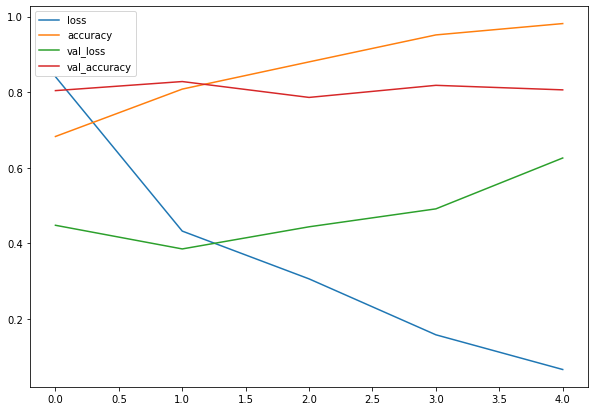

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
pd.DataFrame(history_4.history)

,loss,accuracy,val_loss,val_accuracy
0,0.840872,0.682667,0.447816,0.804
1,0.432405,0.808000,0.385232,0.828
2,0.305999,0.880000,0.443795,0.786
3,0.158093,0.951333,0.491238,0.818
4,0.066307,0.981333,0.625764,0.806


In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

**NOTE** : When a val_loss starts to increase it's likely model that model is overfitting the training dataset.
This means its learning the patterns **too well** and model's ability to generalize unseen data **diminished**

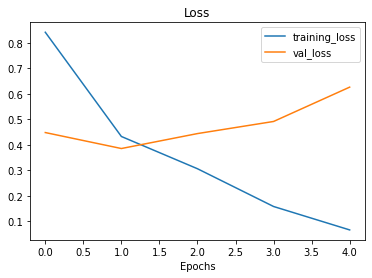

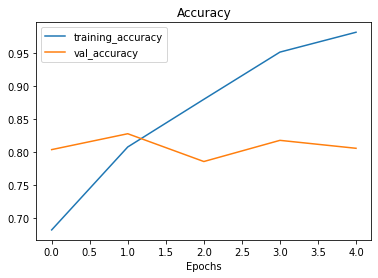

In [ ]:
plot_loss_curves(history_4)

In [ ]:
model_4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_22 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_10 (Flatten)        (None, 475240)            0         
                                                                 
 dense_20 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### Adjust The model Parameters

fitting a machine learning model comes in 3 steps:

0. Create a baseline 
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting


Ways to induce overfitting:

* Increase the number of conv layers.
* Increase the number of conv filters.
* Add another dense layer to o/p of our flattend layer

Reduce Overfitting:
* Add data augmentation
* Add MaxPool2D
* Add more dat

# New section

In [ ]:
# create the model which will be our new baseline using maxpooling

model_5 = Sequential([
  Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(pool_size=2),
  Flatten(),
  Dense(1,activation="sigmoid")
])


In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 187ms/step - loss: 0.5657 - accuracy: 0.7127 - val_loss: 0.4545 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4579 - accuracy: 0.8013 - val_loss: 0.3734 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4302 - accuracy: 0.8127 - val_loss: 0.3839 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3992 - accuracy: 0.8307 - val_loss: 0.3480 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.3728 - accuracy: 0.8453 - val_loss: 0.3496 - val_accuracy: 0.8460


In [ ]:
model_5.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 26, 26, 10)     

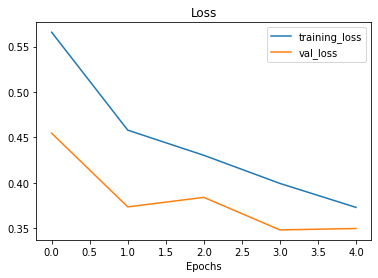

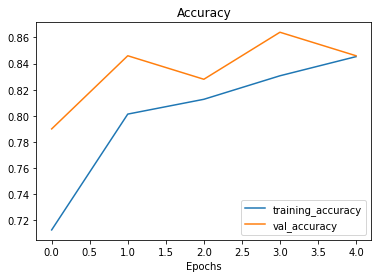

In [ ]:
plot_loss_curves(history_5)

### Finding data augmentation


In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis


# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)


**What is Data Augmentation**

Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Lets write some code to visualize

In [ ]:
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
 # Get sample augmented data batches
 images, labels = train_data.next()
 augmented_images,augmented_labels = train_data_augmented.next()

Showing img number 23


(-0.5, 223.5, 223.5, -0.5)

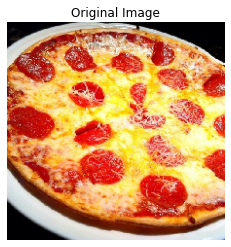

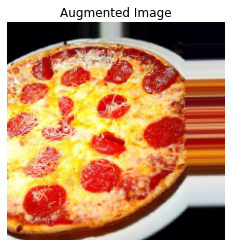

In [ ]:
# show the original image and augmented image
import random
random_number = random.randint(0,32)
print(f"Showing img number {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

In [ ]:
# create model 6
model_6 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = "sigmoid")
])
# compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
# fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 474ms/step - loss: 0.7135 - accuracy: 0.4487 - val_loss: 0.6863 - val_accuracy: 0.6940
Epoch 2/5
47/47 [==============================] - 21s 454ms/step - loss: 0.7030 - accuracy: 0.6147 - val_loss: 0.7483 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 22s 473ms/step - loss: 0.6718 - accuracy: 0.5933 - val_loss: 0.6508 - val_accuracy: 0.5620
Epoch 4/5
47/47 [==============================] - 21s 455ms/step - loss: 0.6556 - accuracy: 0.6593 - val_loss: 0.5615 - val_accuracy: 0.7380
Epoch 5/5
47/47 [==============================] - 21s 452ms/step - loss: 0.6344 - accuracy: 0.6673 - val_loss: 0.5269 - val_accuracy: 0.8320


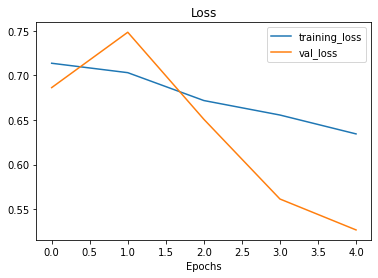

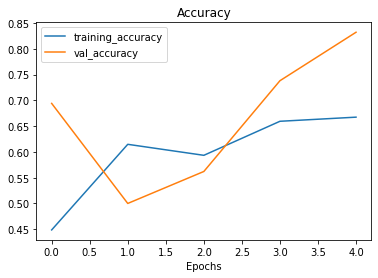

In [ ]:
# check our fitting curves
plot_loss_curves(history_6)

**It's because when we created train_data_augmented we turned off data shuffling using shuffle=False which means our model only sees a batch of a single kind of images at a time.**

In [ ]:
# Let's see what happens when we shuffle the augmented training data.

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# create model 7
model_7 = Sequential([
  Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation="sigmoid")
])
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 457ms/step - loss: 0.6209 - accuracy: 0.6427 - val_loss: 0.4475 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 22s 469ms/step - loss: 0.5000 - accuracy: 0.7687 - val_loss: 0.3524 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 21s 455ms/step - loss: 0.4884 - accuracy: 0.7753 - val_loss: 0.3417 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 21s 451ms/step - loss: 0.4529 - accuracy: 0.7840 - val_loss: 0.3217 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 21s 454ms/step - loss: 0.4700 - accuracy: 0.7873 - val_loss: 0.3391 - val_accuracy: 0.8700


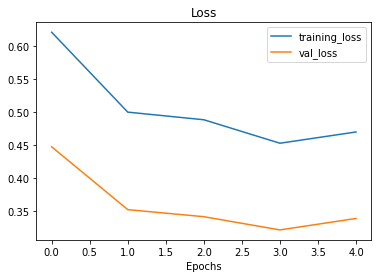

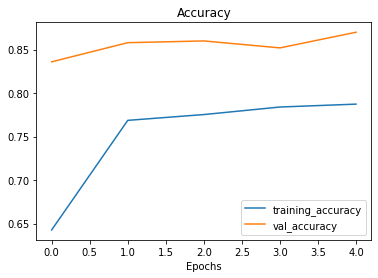

In [ ]:
plot_loss_curves(history_7)

Note: When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

7. Repeat until satisfied
Since we've already beaten our baseline, there are a few things we could try to contine to improve our model:

* Increase the number of model layers (e.g. add more Conv2D/MaxPool2D layers)
*Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
*Train for longer (more epochs)
*Find an ideal learning rate
*Get more data (give the model more opportunities to learn)
*Use transfer learning to leverage what another image model has learn and adjust it for our own use case

##Making a prediction with our trained model on our own custom data

In [ ]:
print(class_names)

['pizza' 'steak']


--2022-07-16 14:03:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.05s   

2022-07-16 14:03:16 (39.2 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

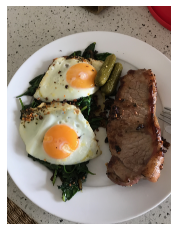

In [ ]:
# view our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

**Note: When you a train a neural network and you want to make a prediction with it on your own custom data, it's important than your custom data (or new data) is preprocessed into the same format as the data your model was trained on.**

In [ ]:
# Create a function to import and image and resize it to be able to be used with our model

def load_and_prep_image(filename,img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it 
  to (img_shape, img_shape, colour_channels).
  """
  #read in the image
  img = tf.io.read_file(filename)
  #decode the read file into a tensor
  img = tf.image.decode_image(img)
  #resizw the image
  img = tf.image.resize(img,size=[img_shape,img_shape])
  #rescale the image and get all values between 0 and 1
  img = img/255.0
  return img

In [ ]:
steak =load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak,axis = 0))

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# we can index the predicted class by rounding the prediction prob
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  #import the target image and preprocess it
  img = load_and_prep_image(filename)

  #make a prediction
  pred = model.predict(tf.expand_dims(img,axis=0))

  #get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"prediction:{pred_class}")
  plt.axis(False)

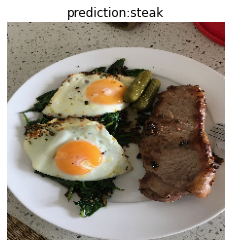

In [ ]:
#test our model
pred_and_plot(model_7,"03-steak.jpeg")

--2022-07-16 14:03:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-07-16 14:03:19 (233 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



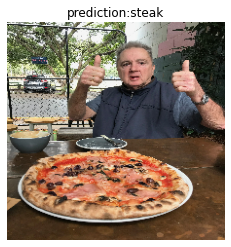

In [ ]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# MULTICLASS CLASSIFICATION

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

* Become one with the data
* Preprocess the data (get it ready for a model)
* Create a model (start with a baseline)
* Fit the model (overfit it to make sure it works)
* Evaluate the model
* Adjust differet hyperparameters and improve the model (try to beat baseline/reduce overfitting)
* Repeat until satisfied

In [ ]:
## 1.Import and become one with the data

import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-07-16 14:03:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   111MB/s    in 4.0s    

2022-07-16 14:03:24 (124 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
import os 
# walk through 10 classes of food image data
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 

In [ ]:
# setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2058751.jpg']
Image shape: (512, 512, 3)


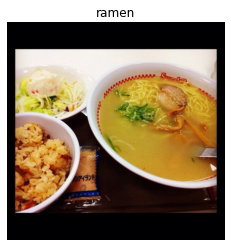

In [ ]:
# Visulize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [ ]:
# 2.Preprocess the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescale
train_datagen = ImageDataGenerator(rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1/255.0)

# load data in from directories and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# 3. Create a model (start with a baseline)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten, Dense, Activation

# create our model (very similar)

model_8 = Sequential([
  Conv2D(10,3,input_shape = (224,224,3)),
  Activation(activation="relu"),
  Conv2D(10,3,input_shape = (224,224,3)),
  MaxPool2D(),
  Conv2D(10,3,activation = "relu"),
  Conv2D(10,3,activation = "relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10,activation ="softmax")
])
model_8.compile(loss = "categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 46s 192ms/step - loss: 2.2421 - accuracy: 0.1643 - val_loss: 2.0616 - val_accuracy: 0.2588
Epoch 2/5
235/235 [==============================] - 44s 189ms/step - loss: 1.9477 - accuracy: 0.3255 - val_loss: 1.9672 - val_accuracy: 0.3328
Epoch 3/5
235/235 [==============================] - 44s 185ms/step - loss: 1.5440 - accuracy: 0.4819 - val_loss: 1.9957 - val_accuracy: 0.3180
Epoch 4/5
235/235 [==============================] - 45s 191ms/step - loss: 0.8975 - accuracy: 0.7163 - val_loss: 2.4438 - val_accuracy: 0.2928
Epoch 5/5
235/235 [==============================] - 43s 184ms/step - loss: 0.2933 - accuracy: 0.9137 - val_loss: 3.3938 - val_accuracy: 0.2916


In [ ]:
# 5. Evaluate the model
model_8.evaluate(test_data)


79/79 [==============================] - 12s 145ms/step - loss: 3.3938 - accuracy: 0.2916


[3.3938066959381104, 0.29159998893737793]

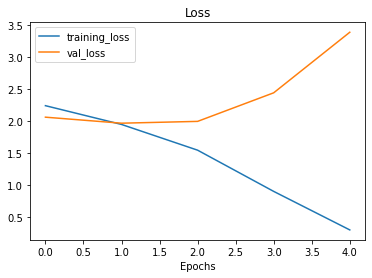

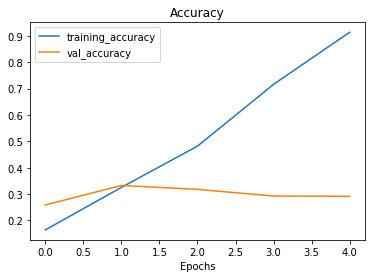

In [ ]:
plot_loss_curves(history_8)

What do these loss curves tell us?

Well... it seems our model is overfitting the training set quite badly... in other words, it's getting great results on the training daa but fails to generalize well to unseen data and performs poorly on the test dataset.

6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)
Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* Get more data - having more data gives a model more opportunity to learn diverse patterns...
* Simpliy the model - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* Use data augmentation - data augmentaiton manipulates the training data in such a way to add more diversity to it (without altering the original data)
* Use transfer learning - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [ ]:
model_8.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_33 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_35 (Conv2D)          (None, 106, 106, 10)      910       
                                                     

In [ ]:
# let's try to remove 2 convulational layers
model_9 = Sequential([
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10,activation="softmax")
])
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_9 = model_9.fit(train_data,
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 43s 181ms/step - loss: 2.4119 - accuracy: 0.2228 - val_loss: 2.0623 - val_accuracy: 0.2540
Epoch 2/5
235/235 [==============================] - 43s 183ms/step - loss: 1.8035 - accuracy: 0.3827 - val_loss: 2.0462 - val_accuracy: 0.2900
Epoch 3/5
235/235 [==============================] - 42s 179ms/step - loss: 1.4865 - accuracy: 0.5084 - val_loss: 1.9860 - val_accuracy: 0.3232
Epoch 4/5
235/235 [==============================] - 43s 182ms/step - loss: 1.0689 - accuracy: 0.6532 - val_loss: 2.3071 - val_accuracy: 0.3056
Epoch 5/5
235/235 [==============================] - 42s 178ms/step - loss: 0.6725 - accuracy: 0.7975 - val_loss: 2.5887 - val_accuracy: 0.2928


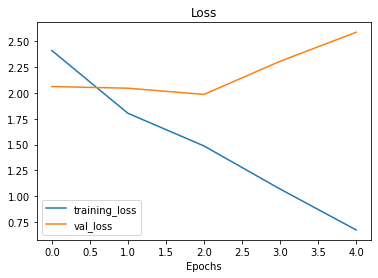

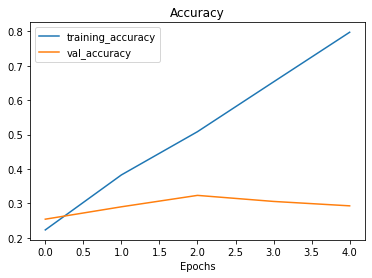

In [ ]:
plot_loss_curves(history_9)

In [ ]:
model_9.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, None, None, 10)    280       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, None, None, 10)   0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, None, None, 10)   0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, None)              0         
                                                                 
 dense_25 (Dense)            (None, 10)              

In [ ]:
model_8.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_33 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_35 (Conv2D)          (None, 106, 106, 10)      910       
                                                     

Looks like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued...

How about we try data augmentation??

Trying to reduce overfitting with data augmentation
Let's try and improve our model's results by using augmented training data...

Ideally, we want to:

* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [ ]:
from pyparsing.core import ZeroOrMore
# create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
# Let's create another model but this time we'll fit it on the augmented training data of 10 classes
model_10 = tf.keras.models.clone_model(model_8)
# Compile the cloned model (using the same setup as previous models)
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_10 = model_10.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 111s 466ms/step - loss: 2.1508 - accuracy: 0.2183 - val_loss: 2.0038 - val_accuracy: 0.2708
Epoch 2/5
235/235 [==============================] - 109s 463ms/step - loss: 2.0464 - accuracy: 0.2711 - val_loss: 1.9013 - val_accuracy: 0.3388
Epoch 3/5
235/235 [==============================] - 110s 467ms/step - loss: 2.0151 - accuracy: 0.2820 - val_loss: 1.8611 - val_accuracy: 0.3468
Epoch 4/5
235/235 [==============================] - 109s 466ms/step - loss: 1.9789 - accuracy: 0.3075 - val_loss: 1.8542 - val_accuracy: 0.3420
Epoch 5/5
235/235 [==============================] - 119s 508ms/step - loss: 1.9541 - accuracy: 0.3183 - val_loss: 1.9325 - val_accuracy: 0.3456


In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 11s 141ms/step - loss: 3.3938 - accuracy: 0.2916


[3.393805742263794, 0.29159998893737793]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 10s 131ms/step - loss: 1.9325 - accuracy: 0.3456


[1.9325125217437744, 0.3456000089645386]

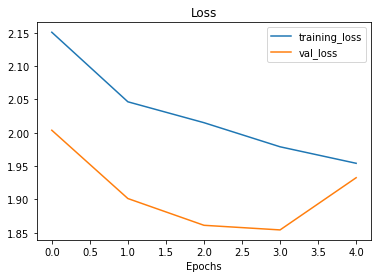

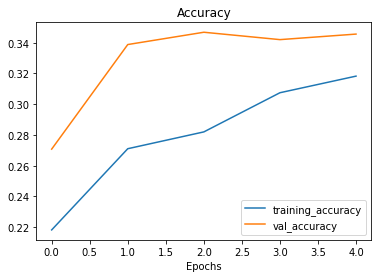

In [ ]:
plot_loss_curves(history_10)

Woah! That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements.

7. Repeat until satisfied
We could keep going here... continally trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiemtns, namely:

* restructuring our model's architecture (increasing layers/hidden units)
* adjust the learning rate
try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
training for longer (e.g. 10 epochs instead of 5 epochs)
* try transfer learning


Making a prediction with our trained model
Let's use our trained model to make some predictions on our own custom images!

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg


--2022-07-16 16:35:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.2’

03-pizza-dad.jpeg.2 100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2022-07-16 16:35:09 (160 MB/s) - ‘03-pizza-dad.jpeg.2’ saved [2874848/2874848]

--2022-07-16 16:35:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, await

In [ ]:
list(class_names)

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

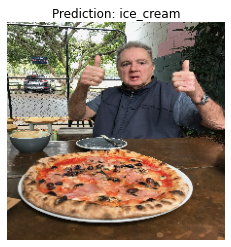

In [ ]:
pred_and_plot(model=model_10,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

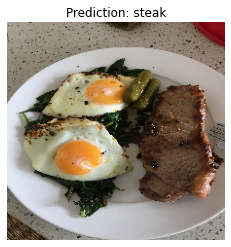

In [ ]:
pred_and_plot(model=model_10,
              filename="03-steak.jpeg",
              class_names=class_names)

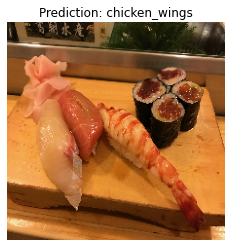

In [ ]:
pred_and_plot(model=model_10,
              filename="03-sushi.jpeg",
              class_names=class_names)

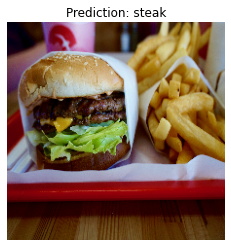

In [ ]:
pred_and_plot(model=model_10,
              filename="03-hamburger.jpeg",
              class_names=class_names)

Looks like our model didn't perform very well on our custom images but this because it only achieved ~39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

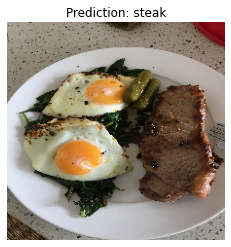

In [ ]:
# Good news: our updated pred_and_plot function works for binary classification too...
pred_and_plot(model=model_3, # trained on pizza vs. steak
              filename="03-steak.jpeg",
              class_names=["pizza", "steak"])


##Saving and loading our model


In [ ]:
# Save a model
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [ ]:
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 13s 167ms/step - loss: 1.9325 - accuracy: 0.3456


[1.9325125217437744, 0.3456000089645386]

In [ ]:
 #Compare our loaded model to our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 12s 156ms/step - loss: 1.9325 - accuracy: 0.3456


[1.932512640953064, 0.3456000089645386]